# Packages

In [6]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
##ACCURACY##
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss

# DEFINE Data

In [7]:
#load breast cancer data

BreastData = load_breast_cancer()

#X Data
X = BreastData.data
#y Data
y = BreastData.target

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44, shuffle =True)

# CREATE A MODEL OF PREDECTION

In [17]:
#Applying LogisticRegression Model 

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
             ==
linear_model.LogisticRegression(random_state=0 )
'''

My_Model = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33,max_iter=1000)
My_Model.fit(X_train, y_train)

#Calculating Details
print(f'LogisticRegressionModel Test Score is : {round((My_Model.score(X_test, y_test)*100),2)} %')
print('LogisticRegressionModel Classes are : ' , My_Model.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , My_Model.n_iter_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = My_Model.predict(X_test)


y_pred_prob = My_Model.predict_proba(X_test)

print('Predicted Value for LogisticRegressionModel is : \n' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : \n' , y_pred_prob[:10])

LogisticRegressionModel Test Score is : 95.91 %
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [1000]
----------------------------------------------------
Predicted Value for LogisticRegressionModel is : 
 [0 0 1 0 1 1 1 1 0 1]
Prediction Probabilities Value for LogisticRegressionModel is : 
 [[9.83699289e-01 1.63007114e-02]
 [9.99824174e-01 1.75825848e-04]
 [6.77293018e-02 9.32270698e-01]
 [9.99999937e-01 6.33247238e-08]
 [3.10861456e-01 6.89138544e-01]
 [3.19021269e-01 6.80978731e-01]
 [4.95929907e-02 9.50407009e-01]
 [3.39821561e-01 6.60178439e-01]
 [9.51830142e-01 4.81698584e-02]
 [3.24404841e-02 9.67559516e-01]]


C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# SCORE OF ERROR

Zero One Loss Value :  8
--------------------------11--------------------------
Confusion Matrix is : 
 [[ 63   5]
 [  3 117]]


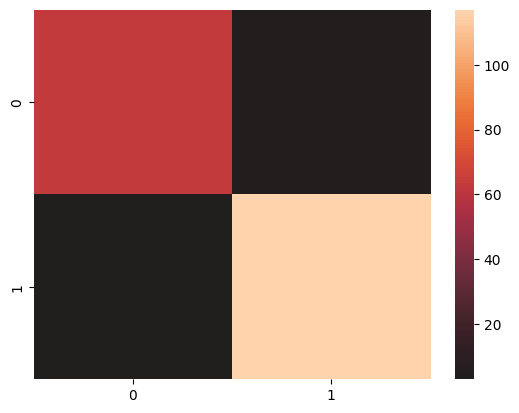

--------------------------1--------------------------
Accuracy Score is :  180
--------------------------2--------------------------
F1 Score is :  0.9574468085106385
--------------------------3--------------------------
Recall Score is :  0.9574468085106383
--------------------------4--------------------------
Precision Score is :  0.9574468085106383
--------------------------5--------------------------
Precision Recall Score is :  (0.9574468085106383, 0.9574468085106383, 0.9574468085106385, None)
--------------------------6--------------------------
Precision Value is :  [0.63829787 0.95901639 1.        ]
Recall Value is :  [1.    0.975 0.   ]
Thresholds Value is :  [0 1]
--------------------------7--------------------------
Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.96      0.97      0.97       120

    accuracy                           0.96       188
   macro avg     

In [9]:
#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)   
ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )

print("--------------------------11--------------------------")

#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

print("--------------------------1--------------------------")
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

print("--------------------------2--------------------------")
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

print("--------------------------3--------------------------")
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

print("--------------------------4--------------------------")

#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

print("--------------------------5--------------------------")
#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

print("--------------------------6--------------------------")
#Calculating Precision recall Curve :  
# precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)
print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

print("--------------------------7--------------------------")
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

print("--------------------------8--------------------------")

#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

print("--------------------------9--------------------------")
#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

print("--------------------------10--------------------------")
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

